In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cv2 as cv
import sys
from google.colab.patches import cv2_imshow
import os
from zipfile import ZipFile


In [ ]:
class Perceptron(): # implement
  threshold = 0.0 # fix
  name = ""

  def __init__(self, name, dataset):
    self.name = name
    self.dataset = dataset

  def get_confidence(self, testImg): # implement

    # for img in dataset

    return 0.0

  def get_name(self):
    return self.name

  def train(): # implement
    return

  def __str__(self):
    return self.name

In [ ]:
class AI():

  def __init__(self):
    self.registeredCountries = {}

  def predict(self): # need to fix, for loop is looping through countries and is calling the method on the inner dictionary with the metas instead of singular metas
    list_of_tuples = []
    for country in self.registeredCountries:
      for dict_meta in self.registeredCountries.get(country):
        for meta in self.registeredCountries.get(country).get(dict_meta):
          list_of_tuples.append(tuple(dict_meta, meta.get_confidence()))

    return list_of_tuples

  def add_perceptron(self, country, perceptron):
    self.registeredCountries.update({country: perceptron})

  def get_dictionary(self):
    return self.registeredCountries


In [ ]:
class Main():
  DIRECTORY_NAME = "/content/FOLDER/"

  def create_perceptron(self, name, dataset):
    return Perceptron(name, dataset)

  def create_AI(self):
    return AI()

  # works hypothetically, need to test out with actual dataset
  def generate_dataset(self, folder, ai):
    DIRECTORY = self.DIRECTORY_NAME + folder
    list_of_metas = os.listdir(DIRECTORY)
    country_metas = {}
    list_of_perceptrons = []
    list_of_metas.remove(".DS_Store")
    for meta in list_of_metas:
      # ai.add_perceptron(folder.split('_')[0], self.create_perceptron(meta.split('_')[0]))
      list_of_imgs = []
      DIRECTORY = DIRECTORY + str(meta)
      files_in_folder = os.listdir(DIRECTORY)
      if ".DS_Store" in files_in_folder:
        files_in_folder.remove(".DS_Store")
      for f in files_in_folder:
        # sets rgb array from the file
        img = cv.imread(cv.samples.findFile(DIRECTORY + "/" + str(f)))
        img = cv.resize(img, (500, 500)) # resizing
        # img = img[0:, 90:150] # cropping image
        # displays the image
        cv2_imshow(img)
        if img is None:
          sys.exit("Could not read the image.")

        list_of_imgs.append(img)

      list_of_perceptrons.append(self.create_perceptron(meta.split('_')[0], list_of_imgs))
      country_metas.update({meta.split('_')[0]: list_of_imgs})
    ai.add_perceptron(folder.split('/')[0], list_of_perceptrons)

    return country_metas

Done


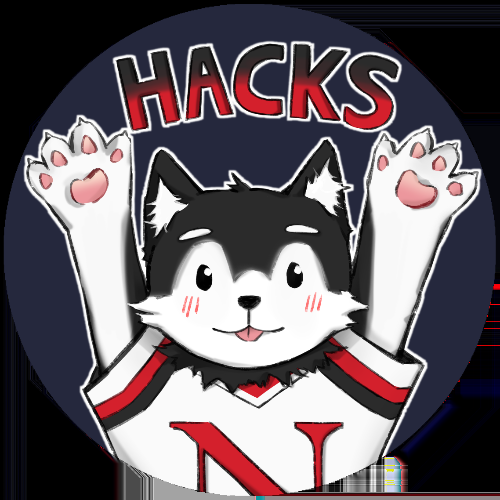

{'COUNTRY': [<__main__.Perceptron object at 0x77fc58a82b60>]}


In [ ]:
# start here
main = Main()
ZIP_FILE = "/content/FOLDER.zip"
COUNTRY_PATHS = ["COUNTRY/"]
META_PATHS = ["NAME_HXW/"]

with ZipFile(ZIP_FILE, 'r') as zip:
      zip.extractall()
      print('Done')

ai = main.create_AI()

for country in COUNTRY_PATHS:
  dataset = main.generate_dataset(country, ai)
  print(ai.get_dictionary())